In [22]:
### Install Qiskit, if needed

!pip install qiskit[visualization]==1.0.2
!pip install qiskit_aer
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit-transpiler-service
!pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to c:\users\derya\appdata\local\temp\pip-req-build-p0az3lpo
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 1742268fcb91b9f53c7f9ca83d3511adf200f3a9
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git 'C:\Users\derya\AppData\Local\Temp\pip-req-build-p0az3lpo'

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
%set_env QXToken=03694f445d2b24a0e22097e6a3fc5fc635266db7fa2780dfa359cc82453f5c85fb08a20a469bedbd8407e0d98f808b0ce866beb1b9048f7c22fea0fea84389bf


env: QXToken=03694f445d2b24a0e22097e6a3fc5fc635266db7fa2780dfa359cc82453f5c85fb08a20a469bedbd8407e0d98f808b0ce866beb1b9048f7c22fea0fea84389bf


In [17]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="<03694f445d2b24a0e22097e6a3fc5fc635266db7fa2780dfa359cc82453f5c85fb08a20a469bedbd8407e0d98f808b0ce866beb1b9048f7c22fea0fea84389bf>",
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)
 
# Load saved credentials
service = QiskitRuntimeService()

IBMNotAuthorizedError: '401 Client Error: Unauthorized for url: https://auth.quantum-computing.ibm.com/api/users/loginWithToken. Login failed., Error code: 3446.'

In [1]:
# imports
import numpy as np
from typing import List, Callable
from scipy.optimize import minimize
from scipy.optimize._optimize import OptimizeResult
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import StatevectorSampler, PrimitiveJob
from qiskit.circuit.library import TwoLocal
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_aer import AerSimulator

In [2]:
# Setup the grader
from qc_grader.challenges.iqc_2024 import (
    grade_lab1_ex1,
    grade_lab1_ex2,
    grade_lab1_ex3,
    grade_lab1_ex4,
    grade_lab1_ex5,
    grade_lab1_ex6,
    grade_lab1_ex7,
)

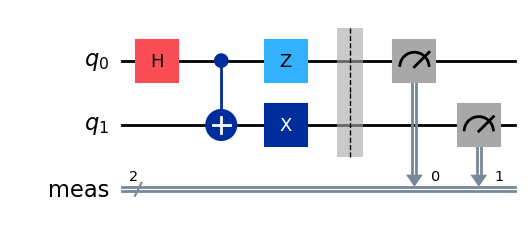

In [3]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1) #apply CNOT
#The phi-minus uses a single Z and a single X gate both occur after the CNOT gate 
qc.x(1) #Single X
qc.z(0) #Single Z 

qc.measure_all()
qc.draw("mpl")

In [4]:
#Submit answer
grade_lab1_ex1(qc) 


Could not find a valid grading server or the grading servers are down right now.
Submitting your answer. Please wait...
Failed: Unable to access service (Forbidden)


In [5]:
#Exercise 2
qc.measure_all()

### Write your code below here ###
sampler = StatevectorSampler()

pub = (qc)
job_sampler = sampler.run([pub], shots=256)

### Don't change any code past this line ###

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'01': 119, '10': 137}


In [6]:
#Submit answer
grade_lab1_ex2(job_sampler)


Submitting your answer. Please wait...
Failed: Unable to access service (Forbidden)


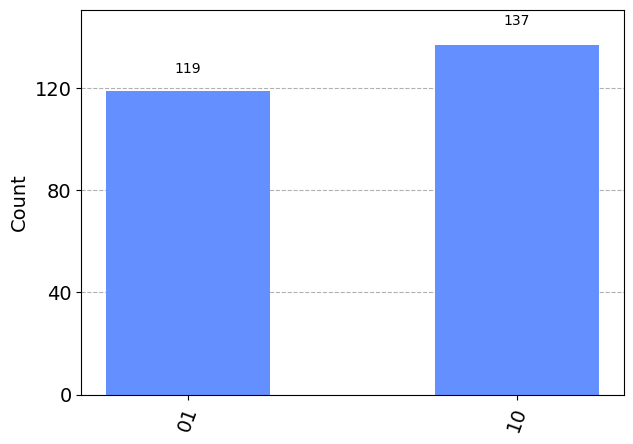

In [7]:
plot_histogram(counts_sampler)

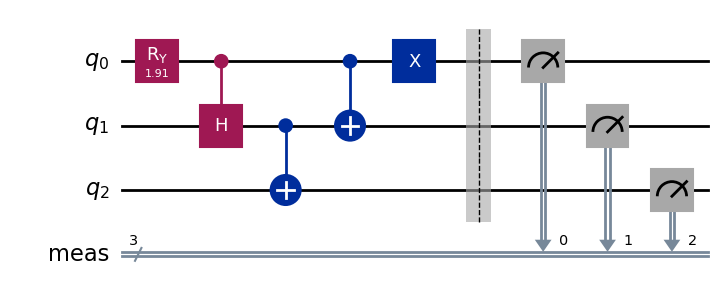

In [8]:
#Exercise 3 

# Step 1
qc = QuantumCircuit(3) #Initialize a 3-qubit circuit 

# Step 2 (provided)
qc.ry(1.91063324, 0)

# Add steps 3-6 below
"""
Perform a controlled hadamard gate on qubit 1, with control qubit 0
Add a CNOT gate with control qubit 1 and target qubit 2
Add a CNOT gate with control qubit 0 and target qubit 1
Add a X gate on qubit 0
"""
qc.ch(0, 1)
qc.cx(1, 2)
qc.cx(0, 1)
qc.x(0)

### Don't change any code past this line ###
qc.measure_all()
qc.draw('mpl')

{'100': 3334, '010': 3359, '001': 3307}


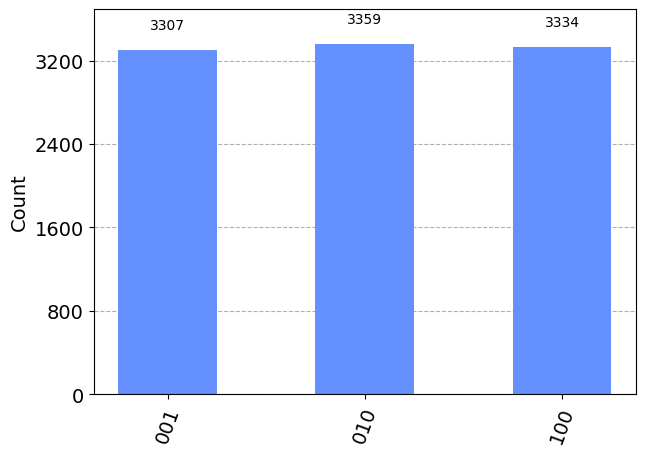

In [9]:
sampler = StatevectorSampler()
pub=(qc)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)
plot_histogram(counts_sampler)

In [10]:
pauli_op = SparsePauliOp(['ZII', 'IZI', 'IIZ'])
print(pauli_op.to_matrix())

[[ 3.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -3.+0.j]]


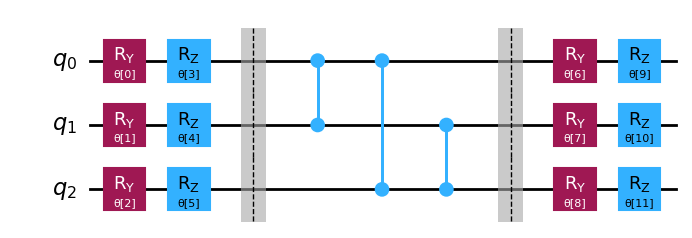

In [11]:
num_qubits = 3
rotation_blocks = ['ry', 'rz']
entanglement_blocks = 'cz'
entanglement = 'full'

# Create the TwoLocal ansatz
ansatz = TwoLocal(num_qubits=num_qubits,
                  rotation_blocks=rotation_blocks,
                  entanglement_blocks=entanglement_blocks,
                  entanglement=entanglement,
                  reps=1,
                  insert_barriers=True)

### Don't change any code past this line ###
ansatz.decompose().draw('mpl')

In [12]:
grade_lab1_ex4(num_qubits, rotation_blocks, entanglement_blocks, entanglement) # Expected result type: int, List[str], str, str

Submitting your answer. Please wait...
Failed: Unable to access service (Forbidden)


In [13]:
#Exercise 5 

from qiskit import transpile


backend_answer = FakeSherbrooke()
optimization_level_answer = 3
pm = generate_preset_pass_manager(backend=backend_answer,optimization_level=optimization_level_answer)
isa_circuit = transpile(qc, backend=backend_answer)




In [14]:
grade_lab1_ex5(isa_circuit) 

Submitting your answer. Please wait...
Failed: Unable to access service (Forbidden)


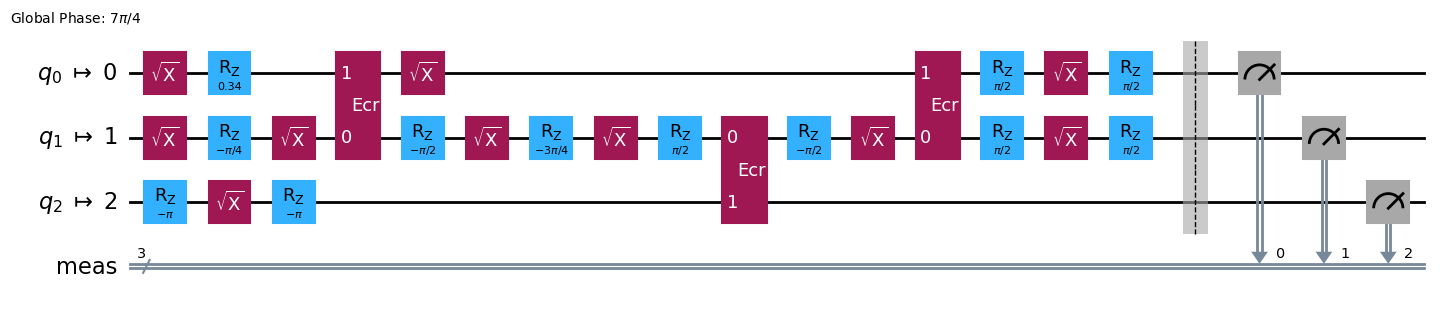

In [15]:
isa_circuit.draw('mpl', idle_wires=False,)